### **Linear Model Using Gradient Descent**



In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [154]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (5).csv


In [155]:
prob = pd.read_csv('data.csv')
prob

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


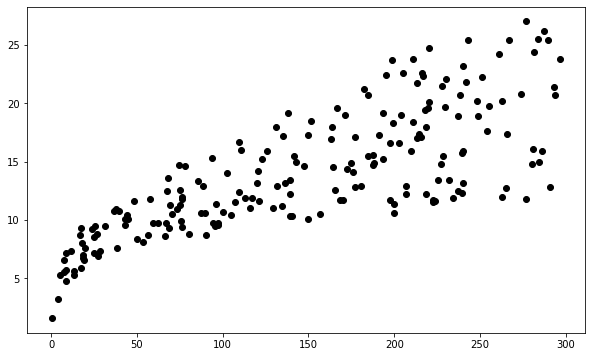

In [156]:
data = pd.read_csv('data.csv')
x = data.iloc[:, 1] #IndependetVarTV
y = data.iloc[:, 4] #DependetVarSales
y_pred = m*x + c
plt.plot(x, y, 'o', color='black');
plt.show()

## **Building the model**

In [157]:
m = 0
c = 0
L = 0.00001  # The learning Rate
epochs = 50  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in x

#--Performing Gradient Descent--
for i in range(epochs): 
    y_pred = m*x + c  # The current predicted value of y
    D_m = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print (m, c)

0.08323873042694489 0.0022036485248894387


## **Making Predictions**

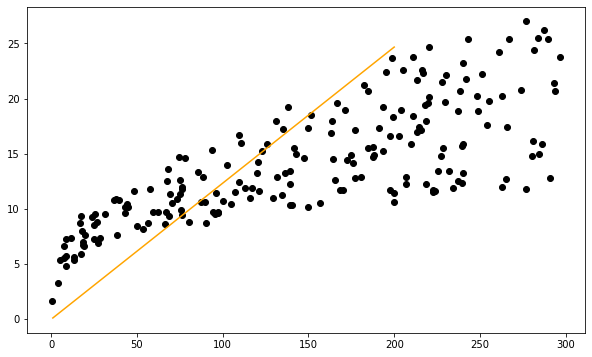

In [159]:
y_pred = m*x + c

plt.plot(x, y, 'o', color='black');
plt.plot([min(a), max(a)], [min(y_pred), max(y_pred)], color='orange')  # regression line
plt.show()

In [160]:
probb = pd.read_csv(r'data.csv',index_col=0)
probb.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [161]:
# STATSMODELS

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=probb).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [162]:
#SCIKIT-LEARN
# create X and y
feature_cols = ['TV']
X = probb[feature_cols]
y = probb.Sales
# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)
# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


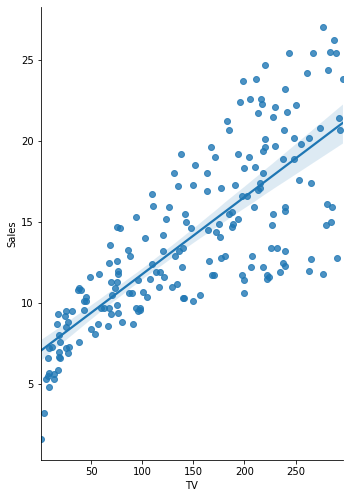

In [163]:
sns.pairplot(probb, x_vars=['TV'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

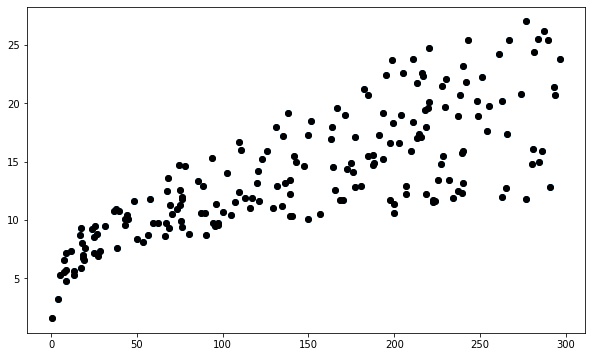

In [164]:
# Preprocessing Input data
XX = probb['TV'] 
YY = probb['Sales']
plt.scatter(XX, YY)
plt.plot(XX, YY, 'o', color='black');
plt.show()

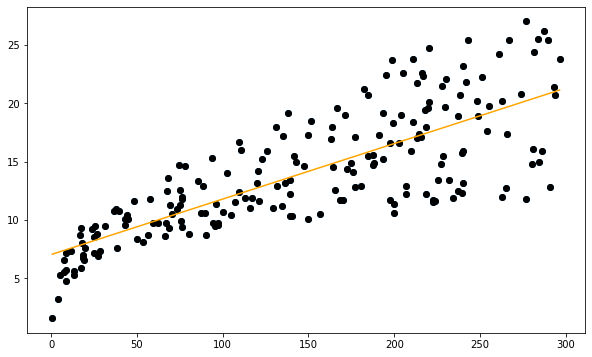

In [165]:
Y_predx = lm2.coef_*XX +  lm2.intercept_
plt.scatter(XX, YY) 
plt.plot(XX, YY, 'o', color='black');
plt.plot([min(XX), max(XX)], [min(Y_predx), max(Y_predx)], color='orange')  # regression line
plt.show()

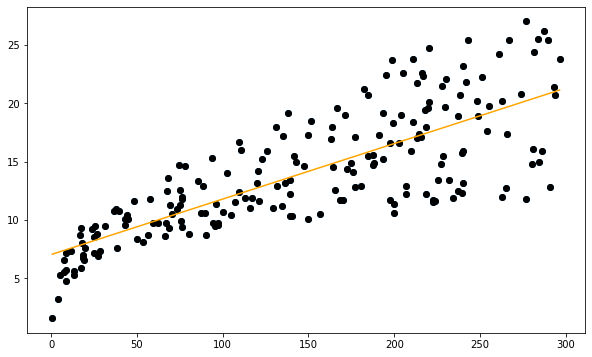

In [166]:
#Y_predx = lm2.coef_*XX +  lm2.intercept_
Y_predx = 0.04753664*XX + 7.032593549127695
plt.scatter(XX, YY)
plt.plot(XX, YY, 'o', color='black');
plt.plot([min(XX), max(XX)], [min(Y_predx), max(Y_predx)], color='orange')  # regression line
plt.show()

In [167]:
m = 0
c = 0
L = 0.00001  # The learning Rate
epochs = 50  # The number of iterations to perform gradient descent

n = float(len(XX)) # Number of elements in XX

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*XX + c  # The current predicted value of YY
    D_m = (-2/n) * sum(XX * (YY - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(YY - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print (m, c)

0.08323873042694489 0.0022036485248894387


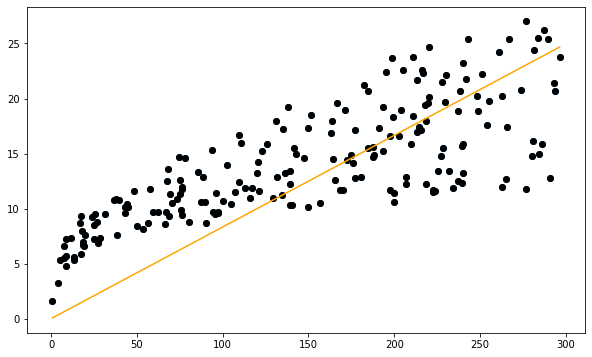

In [168]:
YY_pred = m*XX + c
plt.scatter(XX, YY)
plt.plot(XX, YY, 'o', color='black');
plt.plot([min(XX), max(XX)], [min(YY_pred), max(YY_pred)], color='orange')  # regression line
plt.show()